# Demonstrate basic functionality of confit

## Imports

We need to explictly add the path to the library since we haven't installed it yet. 

In [1]:
import sys
sys.path.append('../src')
import confit
import numpy as np
import lmfit
from matplotlib import pyplot as plt
import seaborn as sns

Check that we have the right module

In [2]:
confit?

Type:        module
String form: <module 'confit' from '/Users/will/Dropbox/confit/notebooks/../src/confit.py'>
File:        ~/Dropbox/confit/src/confit.py
Docstring:   Fit conic section curves to data.

## Test data

Symmetric arrangement of 6 points

In [3]:
xpts, ypts = np.array([1, 2, 3, 5, 6, 7]), np.array([0, 4, 6, 6, 4, 0])
ypts += xpts
xpts *= 3

Plot the points

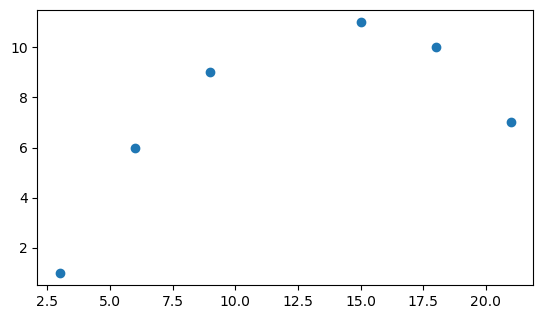

In [4]:
fig, ax = plt.subplots()
ax.scatter(xpts, ypts)
ax.set_aspect("equal")
...;

## Initial guess at conic parameters

This is done automatically inside the fitting function, but we will do it explicitly so we can see what it is doing

In [5]:
initial_conic = confit.init_conic_from_xy(xpts, ypts)
initial_conic

{'x0': 12.0,
 'y0': 8.0,
 'r0': 5.82188282521972,
 'theta0': 50.50866913802189,
 'eccentricity': 1.0}

Look at the residuals for this initial guess, which is
$$
r - e d
$$
where $r$ is the radius of each point from the focus and $d$ is the distance of each point from the directrix. 

We turn on DEBUG so that the residual function will print out the individual vectors, $r$, $d$, and $e \times d$. 

In [6]:
initial_params = lmfit.create_params(**initial_conic)
confit.DEBUG = True
confit.residual(initial_params, xpts, ypts)

r = [11.40175425  6.32455532  3.16227766  4.24264069  6.32455532  9.05538514]
d = [22.76946453 17.00297606 12.77992922  7.42071881  6.28455524  6.69183331]
e d = [22.76946453 17.00297606 12.77992922  7.42071881  6.28455524  6.69183331]


array([-11.36771028, -10.67842074,  -9.61765156,  -3.17807813,
         0.04000008,   2.36355183])

The residuals are all negative, meaning the points are all inside the conic. This suggests that `r0` is overestimated. 

Turn the `DEBUG` flag back off.

In [7]:
confit.DEBUG = False

## Do the fitting

We set `only_parabola=False` so that the eccentricity is allowed to vary. 

In [8]:
result = confit.fit_conic_to_xy(xpts, ypts, only_parabola=False)

In [9]:
result

So the best fit is an ellipse with quite a high eccentricity. The scale `r0` (the distance from the focus to the apex) is 0.417, which is considerably smaller than we started with. 

There are some significant correlations between parameters, but the uncertainty in the fit is tiny, so this does not really matter. 

Look at the residuals:

In [10]:
result.residual

array([-3.55271368e-15, -1.77635684e-15,  0.00000000e+00,  3.10862447e-15,
        1.77635684e-15, -2.66453526e-15])

Also tiny. 

Now look at the distances that go into the residuals. 

In [11]:
confit.DEBUG = True
confit.residual(result.params, xpts, ypts)
confit.DEBUG = False

r = [13.50836774  9.04667827  6.1945438   3.70938486  4.07636038  6.0528909 ]
d = [16.51587726 11.06083509  7.57370002  4.53524409  4.98392323  7.40050946]
e d = [13.50836774  9.04667827  6.1945438   3.70938486  4.07636038  6.0528909 ]


They really are all the same. 

## Plotting the best fit onto the data

In [12]:
best_xy = confit.XYconic(**result.params.valuesdict())
print(best_xy)

Conic section curve with focus at (14.954103374596437, 7.290899097792872), scale factor 4.096508094252297, angle 79.72197739020828, and eccentricity 0.8179019210783685.


In [13]:
init_xy = confit.XYconic(**initial_conic)
print(init_xy)

Conic section curve with focus at (12.0, 8.0), scale factor 5.82188282521972, angle 50.50866913802189, and eccentricity 1.0.


/Users/will/Dropbox/confit/notebooks/../src/confit.py:99: RuntimeWarning: divide by zero encountered in true_divide
  self.r0


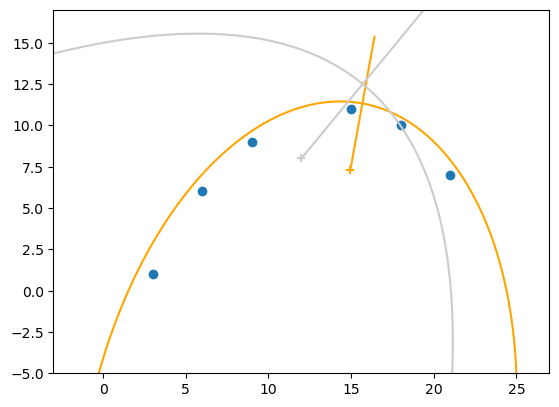

In [14]:
fig, ax = plt.subplots()
ax.scatter(xpts, ypts)

c = "orange"
ax.plot(best_xy.x_pts, best_xy.y_pts, color=c)
ax.scatter(best_xy.x0, best_xy.y0, marker="+", color=c)
ax.plot([best_xy.x0, best_xy.x_mirror], [best_xy.y0, best_xy.y_mirror], color=c)

c = "0.8"
ax.plot(init_xy.x_pts, init_xy.y_pts, color=c)
ax.scatter(init_xy.x0, init_xy.y0, marker="+", color=c)
ax.plot([init_xy.x0, init_xy.x_mirror], [init_xy.y0, init_xy.y_mirror], color=c)

ax.set_aspect("equal")
margin = 6
ax.set(
    xlim=[xpts.min() - margin, xpts.max() + margin],
    ylim=[ypts.min() - margin, ypts.max() + margin],
)
...;

In [15]:
confit.fit_conic_to_xy(best_xy.x_pts, best_xy.y_pts, only_parabola=False)